**Индивидуальное задание**

1. Набор данных machine.data 
2. Реализуйте первичную обработку данных загруженного набора. Выполните полный спектр операций для загруженного набора данны: загрузка, визуализация, обработка пропущенных значений, обработка категориальных данных и разделение выборки на тестовую и тренировочную.

Первые 5 строк данных:
  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132


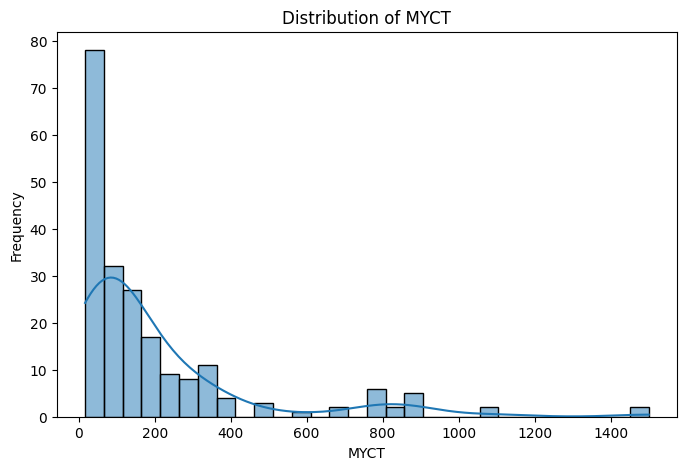

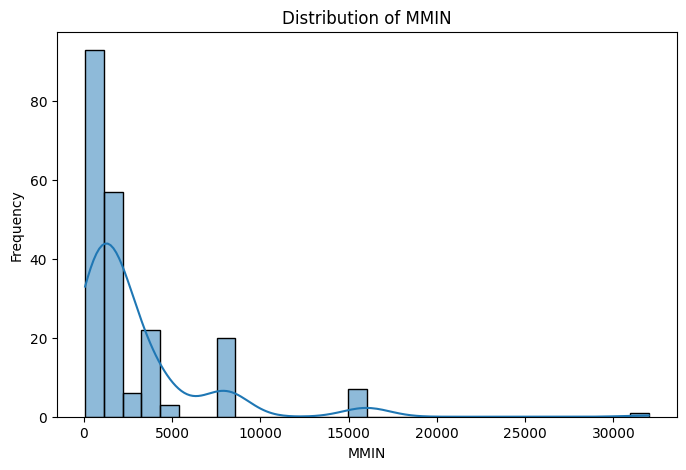

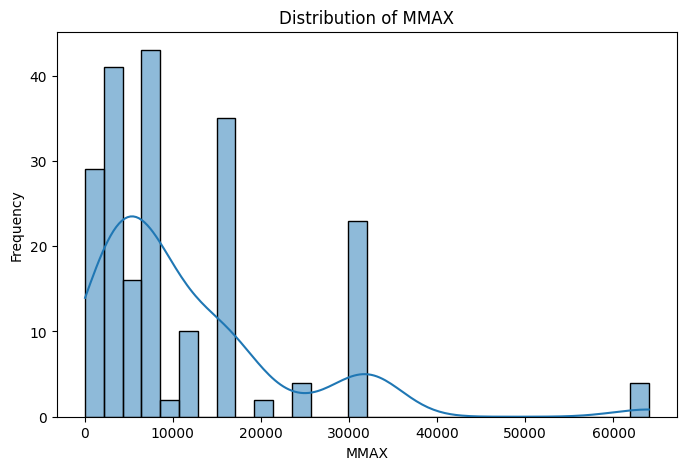

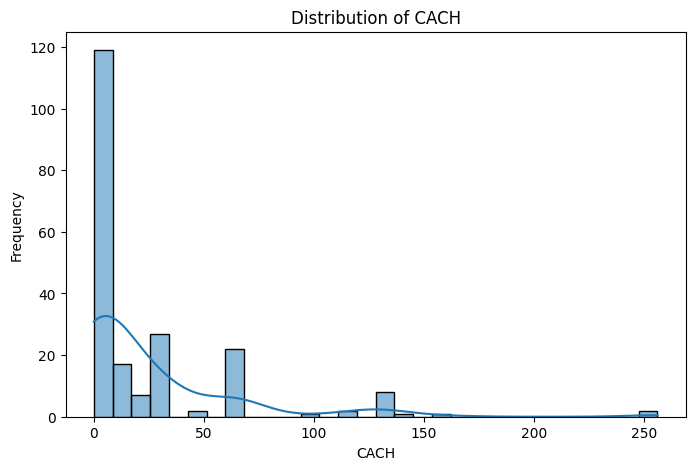

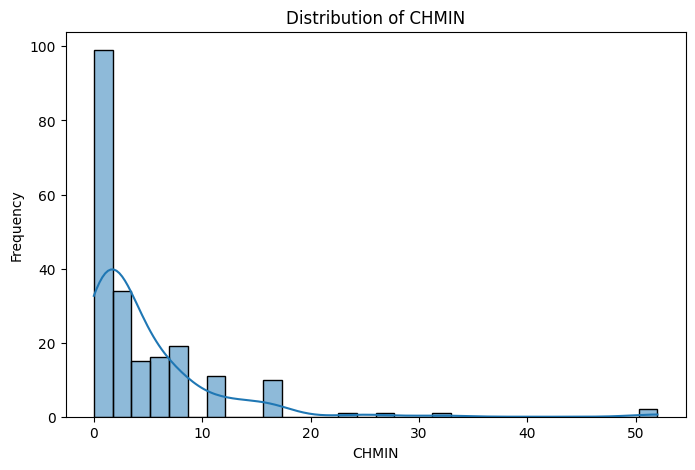

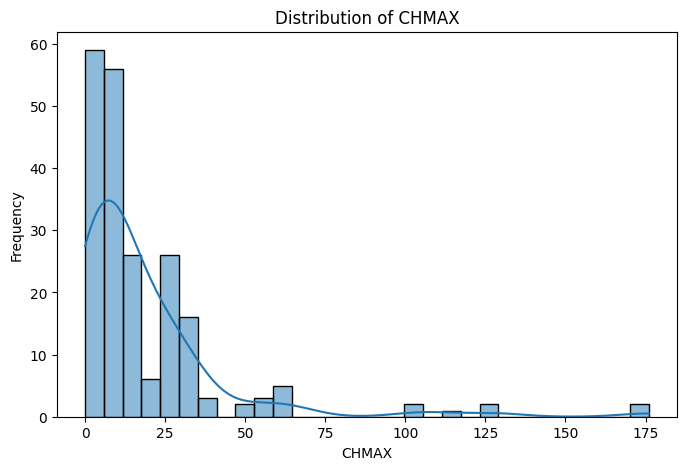

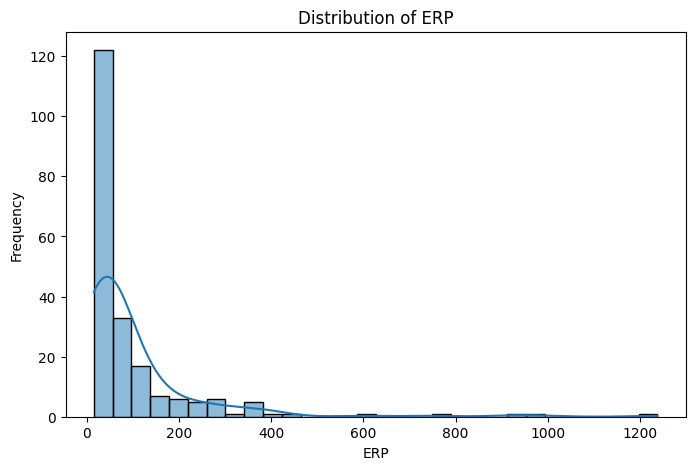

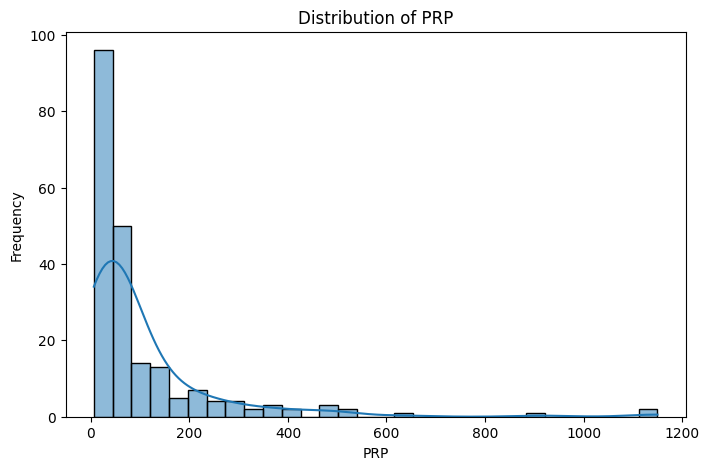

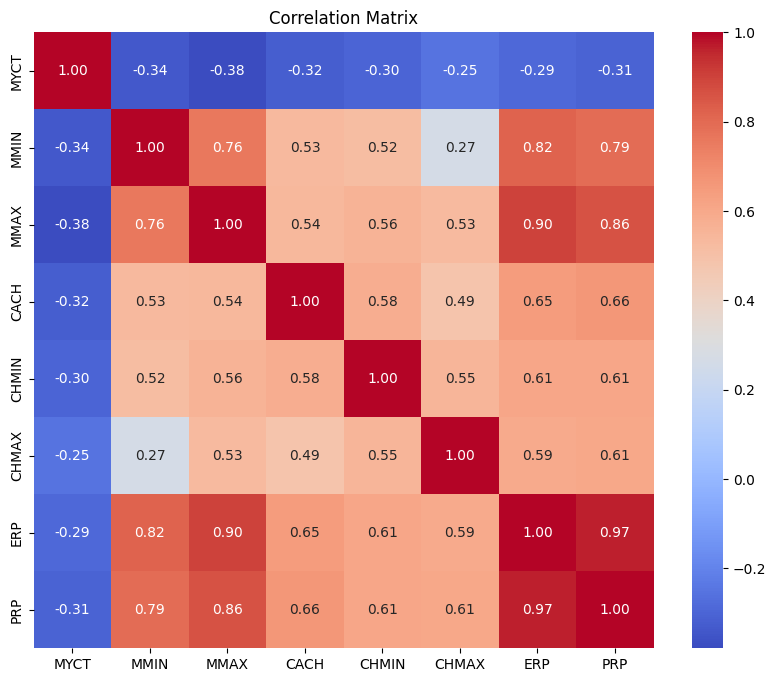

Пропущенные значения в каждом столбце:
VendorName    0
ModelName     0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
ERP           0
dtype: int64
Размер тренировочной выборки: (167, 246)
Размер тестовой выборки: (42, 246)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1: Загрузка данных
file_path = "machine.data"
column_names = [
    "VendorName", "ModelName", "MYCT", "MMIN", "MMAX", 
    "CACH", "CHMIN", "CHMAX", "PRP", "ERP"
]

data = pd.read_csv(file_path, header=None, names=column_names)
print("Первые 5 строк данных:")
print(data.head())

# 2: Визуализация данных
numeric_columns = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "ERP"]  # PRP исключается
categorical_columns = ["VendorName", "ModelName"]

# Построение гистограмм для числовых признаков
for column in numeric_columns + ["PRP"]:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Построение матрицы корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_columns + ["PRP"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 3: Проверка и обработка пропущенных значений
print("Пропущенные значения в каждом столбце:")
print(data.isnull().sum())

# 4: Обработка категориальных данных
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

# Создание пайплайна для предварительной обработки
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Целевая переменная (PRP) и признаки
X = data.drop(columns=["PRP"])  # Признаки
y = data["PRP"]  # Целевая переменная

# Применение обработки данных
X_processed = preprocessor.fit_transform(X)

# 5: Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Вывод размеров выборок
print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
